<a href="https://colab.research.google.com/github/kapilsingh9069/HDR/blob/main/Handwritten_Digits_Recognition_Using_KNN.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

It Is A classification Problem 
 Since We are predicting digits from 0 - 9 , so It Has 10 Categories

Since we are using grey images of pixel 8x8 
Therefore , all together we are usung 64 features in grey images
if its a color images then we need to use 64/3 features

### Datasets 
There is  a inbuilt dataset which we can load from Sckit learn library

In [ ]:
# Loading  Dataset
from sklearn.datasets import load_digits

In [ ]:
dataset=load_digits()


In [ ]:
data = dataset.data
images = dataset.images
target = dataset.target

In [ ]:
print('Data Shape :',dataset.data)
print("Images Shape:",dataset.images)
print('Target Shape:',dataset.target)

Data Shape : [[ 0.  0.  5. ...  0.  0.  0.]
 [ 0.  0.  0. ... 10.  0.  0.]
 [ 0.  0.  0. ... 16.  9.  0.]
 ...
 [ 0.  0.  1. ...  6.  0.  0.]
 [ 0.  0.  2. ... 12.  0.  0.]
 [ 0.  0. 10. ... 12.  1.  0.]]
Images Shape: [[[ 0.  0.  5. ...  1.  0.  0.]
  [ 0.  0. 13. ... 15.  5.  0.]
  [ 0.  3. 15. ... 11.  8.  0.]
  ...
  [ 0.  4. 11. ... 12.  7.  0.]
  [ 0.  2. 14. ... 12.  0.  0.]
  [ 0.  0.  6. ...  0.  0.  0.]]

 [[ 0.  0.  0. ...  5.  0.  0.]
  [ 0.  0.  0. ...  9.  0.  0.]
  [ 0.  0.  3. ...  6.  0.  0.]
  ...
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  1. ...  6.  0.  0.]
  [ 0.  0.  0. ... 10.  0.  0.]]

 [[ 0.  0.  0. ... 12.  0.  0.]
  [ 0.  0.  3. ... 14.  0.  0.]
  [ 0.  0.  8. ... 16.  0.  0.]
  ...
  [ 0.  9. 16. ...  0.  0.  0.]
  [ 0.  3. 13. ... 11.  5.  0.]
  [ 0.  0.  0. ... 16.  9.  0.]]

 ...

 [[ 0.  0.  1. ...  1.  0.  0.]
  [ 0.  0. 13. ...  2.  1.  0.]
  [ 0.  0. 16. ... 16.  5.  0.]
  ...
  [ 0.  0. 16. ... 15.  0.  0.]
  [ 0.  0. 15. ... 16.  0.  0.]
  [ 0.  0

In [ ]:
print('Data Shape :',data.shape)      ## it has 1797 rows and 64 columns
print("Images Shape:",images.shape)   ## it has 1797 images of size 8x8(resolution)
print('Target Shape:',target.shape)    ## One Dimensional Array

Data Shape : (1797, 64)
Images Shape: (1797, 8, 8)
Target Shape: (1797,)


In [ ]:
print(data[:10,:])

[[ 0.  0.  5. 13.  9.  1.  0.  0.  0.  0. 13. 15. 10. 15.  5.  0.  0.  3.
  15.  2.  0. 11.  8.  0.  0.  4. 12.  0.  0.  8.  8.  0.  0.  5.  8.  0.
   0.  9.  8.  0.  0.  4. 11.  0.  1. 12.  7.  0.  0.  2. 14.  5. 10. 12.
   0.  0.  0.  0.  6. 13. 10.  0.  0.  0.]
 [ 0.  0.  0. 12. 13.  5.  0.  0.  0.  0.  0. 11. 16.  9.  0.  0.  0.  0.
   3. 15. 16.  6.  0.  0.  0.  7. 15. 16. 16.  2.  0.  0.  0.  0.  1. 16.
  16.  3.  0.  0.  0.  0.  1. 16. 16.  6.  0.  0.  0.  0.  1. 16. 16.  6.
   0.  0.  0.  0.  0. 11. 16. 10.  0.  0.]
 [ 0.  0.  0.  4. 15. 12.  0.  0.  0.  0.  3. 16. 15. 14.  0.  0.  0.  0.
   8. 13.  8. 16.  0.  0.  0.  0.  1.  6. 15. 11.  0.  0.  0.  1.  8. 13.
  15.  1.  0.  0.  0.  9. 16. 16.  5.  0.  0.  0.  0.  3. 13. 16. 16. 11.
   5.  0.  0.  0.  0.  3. 11. 16.  9.  0.]
 [ 0.  0.  7. 15. 13.  1.  0.  0.  0.  8. 13.  6. 15.  4.  0.  0.  0.  2.
   1. 13. 13.  0.  0.  0.  0.  0.  2. 15. 11.  1.  0.  0.  0.  0.  0.  1.
  12. 12.  1.  0.  0.  0.  0.  0.  1. 10.  8.  0.  0.  0.

In [ ]:
print(images[:10,:])

[[[ 0.  0.  5. 13.  9.  1.  0.  0.]
  [ 0.  0. 13. 15. 10. 15.  5.  0.]
  [ 0.  3. 15.  2.  0. 11.  8.  0.]
  [ 0.  4. 12.  0.  0.  8.  8.  0.]
  [ 0.  5.  8.  0.  0.  9.  8.  0.]
  [ 0.  4. 11.  0.  1. 12.  7.  0.]
  [ 0.  2. 14.  5. 10. 12.  0.  0.]
  [ 0.  0.  6. 13. 10.  0.  0.  0.]]

 [[ 0.  0.  0. 12. 13.  5.  0.  0.]
  [ 0.  0.  0. 11. 16.  9.  0.  0.]
  [ 0.  0.  3. 15. 16.  6.  0.  0.]
  [ 0.  7. 15. 16. 16.  2.  0.  0.]
  [ 0.  0.  1. 16. 16.  3.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  1. 16. 16.  6.  0.  0.]
  [ 0.  0.  0. 11. 16. 10.  0.  0.]]

 [[ 0.  0.  0.  4. 15. 12.  0.  0.]
  [ 0.  0.  3. 16. 15. 14.  0.  0.]
  [ 0.  0.  8. 13.  8. 16.  0.  0.]
  [ 0.  0.  1.  6. 15. 11.  0.  0.]
  [ 0.  1.  8. 13. 15.  1.  0.  0.]
  [ 0.  9. 16. 16.  5.  0.  0.  0.]
  [ 0.  3. 13. 16. 16. 11.  5.  0.]
  [ 0.  0.  0.  3. 11. 16.  9.  0.]]

 [[ 0.  0.  7. 15. 13.  1.  0.  0.]
  [ 0.  8. 13.  6. 15.  4.  0.  0.]
  [ 0.  2.  1. 13. 13.  0.  0.  0.]
  [ 0.  0.  2. 15. 11.

In [ ]:
print(target)

[0 1 2 ... 8 9 8]


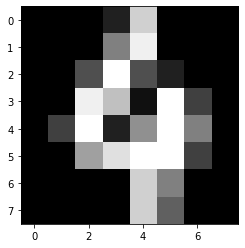

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(images[100],cmap='gray');
plt.show();

In [ ]:
print(images[100])                                                                    ## It contains the values of the above images in the rows and column as its a 2D

[[ 0.  0.  0.  2. 13.  0.  0.  0.]
 [ 0.  0.  0.  8. 15.  0.  0.  0.]
 [ 0.  0.  5. 16.  5.  2.  0.  0.]
 [ 0.  0. 15. 12.  1. 16.  4.  0.]
 [ 0.  4. 16.  2.  9. 16.  8.  0.]
 [ 0.  0. 10. 14. 16. 16.  4.  0.]
 [ 0.  0.  0.  0. 13.  8.  0.  0.]
 [ 0.  0.  0.  0. 13.  6.  0.  0.]]


In [ ]:
print(data[100])                                                                    ## IT contains the flatten version of the each and every images

[ 0.  0.  0.  2. 13.  0.  0.  0.  0.  0.  0.  8. 15.  0.  0.  0.  0.  0.
  5. 16.  5.  2.  0.  0.  0.  0. 15. 12.  1. 16.  4.  0.  0.  4. 16.  2.
  9. 16.  8.  0.  0.  0. 10. 14. 16. 16.  4.  0.  0.  0.  0.  0. 13.  8.
  0.  0.  0.  0.  0.  0. 13.  6.  0.  0.]


In [ ]:
print(target[100])     ## It contains the output or labels of the images

4


The given 8x8 images is flatten .
Each row is arranged in one dimensional Array. 
Thus 8x8 2d becomes 64 one D,We cant apply to a machine 


### Training AND Testing Part

In [ ]:
from sklearn.model_selection import train_test_split

train_data,test_data,train_target,test_target=train_test_split(data,target,test_size=0.2,random_state=10)

In [ ]:
print("Train_data:",train_data.shape)
print("Test_data:",test_data.shape)

Train_data: (1437, 64)
Test_data: (360, 64)


### Model Building

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

model=KNeighborsClassifier()
model.fit(train_data,train_target)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [ ]:
predicted_target=model.predict(test_data)

### Accuracy Score

In [ ]:
from sklearn.metrics import accuracy_score

acc=accuracy_score(test_target,predicted_target)

print('accuracy:',acc)

accuracy: 0.9861111111111112


In [ ]:
360* 0.98

352.8

In [ ]:
import joblib

joblib.dump(model,'KNN-Handwritten-Digits-Recognition.sav')

['KNN-Handwritten-Digits-Recognition.sav']

In [ ]:
!pip install opencv-python

In [ ]:
import tkinter as tk
from PIL import ImageTk,Image,ImageDraw
from matplotlib import pyplot as plt
import cv2                             ## Image processing application
import numpy as np
import joblib
burn =tk.Tk()     #Main Window

w=900
h=500
count = 0
model = joblib.load("KNN-Handwritten-Digits-Recognition.sav")

def eventFunction(event):
    x=event.x
    y=event.y
    
    x1=x-30
    x2=x+30
    
    y1=y-30
    y2=y+30
    
    canvas.create_oval((x1,y1,x2,y2),fill='black')    ## Whenever er draw an image in canvas it dutomatically draws 
    imgDraw.ellipse((x1,y1,x2,y2),fill="white")       ## the same image in image also
    
def save():
    global count
    #print("Here")
    imgArray=np.array(img)             ## Converting image into numpy array
    cv2.imwrite(str(count)+'.png',imgArray)  ## saving the file in opencv in the current path 
    count+=1
    
def clear():
    global img,imgDraw
    canvas.delete('all')                    ## Clearing The Canvas 
    img = Image.new("RGB",(w,h),(0,0,0))    ## Load the imaging as as result the previous image is cleared and new image is predicted
    imgDraw = ImageDraw.Draw(img)
    
def predict():
    
    imgArray=np.array(img)
    imgArray=cv2.cvtColor(imgArray,cv2.COLOR_BGR2GRAY) #Converting RGB TO GRAY
    imgArray=cv2.resize(imgArray,(8,8))  ## Resizing to 8x8
    imgArray=imgArray.reshape(1,64)      ## Flattening the image
    prediction=model.predict(imgArray)
    #print(prediction)
    labelStatus.config(text="Predicited Digit:"+str(prediction))
    
fontButton = 'Helvetica 20 bold'
fontLabel = 'Helvetica 24 bold'

canvas = tk.Canvas(burn,width=w,height=h,bg="white")         ## Calling method for the canvas 

canvas.grid(row=0,column=0,columnspan=4)     ## Placing of Canvas in respective row and column is  done using grid
                                            ## ColumnSpan Divides the row(width) into 4 equal parts or simply it keeps spaces 
                                            ## for the buttons
                                                     


## Adding Of fOUR Buttons Namely  Save, Predict , Clear And Exit

buttonSave=tk.Button(burn,text="SAVE",bg="White",fg="black",font=fontButton,command = save)  
buttonSave.grid(row=1,column=0)                                                              ## Placing it in 1st row

buttonPredict=tk.Button(burn,text="Predict",bg="white",fg="black",font=fontButton,command=predict)
buttonPredict.grid(row=1,column=1)

buttonClear=tk.Button(burn,text="Clear",bg="white",fg="black",font=fontButton,command=clear)
buttonClear.grid(row=1,column=2)

buttonExit=tk.Button(burn,text="Exit",bg="white",fg="black",font=fontButton,command=burn.destroy)
buttonExit.grid(row=1,column=3)

labelStatus=tk.Label(burn,text="Predicted Digit: None",bg="white",fg="black",font=fontLabel)
labelStatus.grid(row=2,column=0,columnspan=4)

canvas.bind('<B1-Motion>',eventFunction)

img = Image.new("RGB",(w,h),(0,0,0))  ## Creates piloow images RGB is the coloured image , width and height, (0,0,0)is the black background ,
imgDraw = ImageDraw.Draw(img)         ## its creating a black image bcoz images from the datasets are bg=black and fg=white
## Whenever we pass  any digits or alphabets we need to use as bg=black and fg = white
## Because it saves time
burn.mainloop()   # Runing the Main Window

TclError: ignored